In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from logistic_regression import LogisticRegression

In [2]:
np.random.seed(0)

dataset = pd.read_csv("Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
two_iris = dataset.iloc[:100]
two_iris = two_iris.sample(frac=1).reset_index(drop=True)
two_iris = two_iris.loc[:, "SepalLengthCm":]
two_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.0,3.4,1.6,0.4,Iris-setosa
1,6.7,3.1,4.7,1.5,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-setosa
3,5.7,2.8,4.5,1.3,Iris-versicolor
4,6.6,3.0,4.4,1.4,Iris-versicolor
...,...,...,...,...,...
95,5.7,2.9,4.2,1.3,Iris-versicolor
96,5.8,2.7,4.1,1.0,Iris-versicolor
97,5.6,2.9,3.6,1.3,Iris-versicolor
98,4.6,3.2,1.4,0.2,Iris-setosa


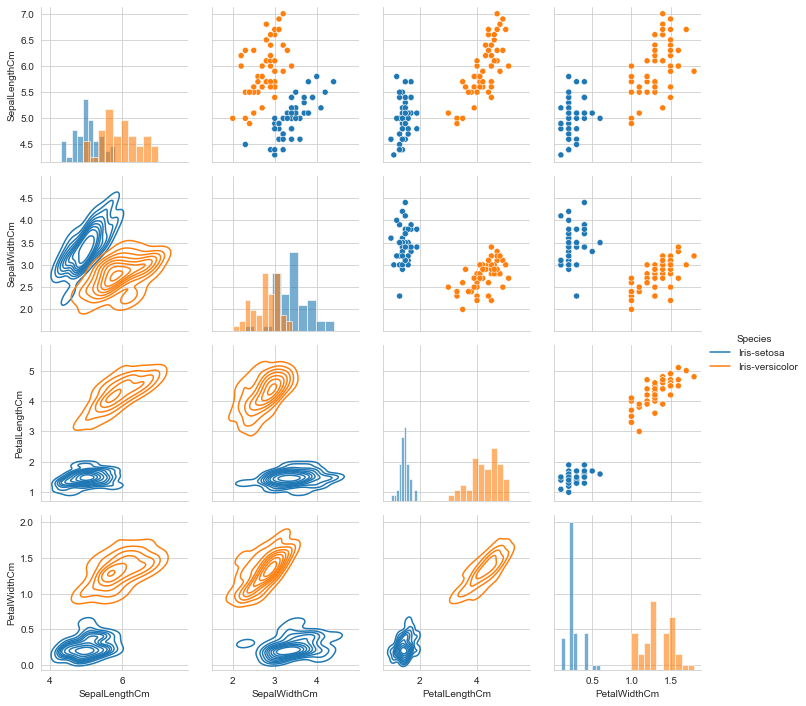

In [4]:
sns.set_style("whitegrid")
graphs = sns.PairGrid(data=two_iris, hue='Species')
graphs.map_upper(sns.scatterplot)
graphs.map_diag(plt.hist, alpha=0.6)
graphs.map_lower(sns.kdeplot)
graphs.add_legend();

In [5]:
two_iris.loc[two_iris['Species'] == "Iris-setosa", 'Species'] = 1
two_iris.loc[two_iris['Species'] == "Iris-versicolor", 'Species'] = 0

In [6]:
X = np.array(two_iris.loc[:, 'SepalLengthCm':'PetalWidthCm'])
y = np.array(two_iris.loc[:, two_iris.columns == 'Species'])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Fitting

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

### Predicting

In [9]:
y_pred = model.predict(X_test)
print(y_pred.tolist())

[[1], [1], [1], [1], [1], [0], [1], [1], [0], [1], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [1], [0], [1], [1], [0], [0], [1]]


### Predicting probabilities 

In [10]:
y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba.tolist())

[[0.7413895701974084], [0.6993163303811053], [0.7484809987017544], [0.7970764814422533], [0.7487558547384952], [0.22865761237765708], [0.6865173097477854], [0.673212563784579], [0.2043539281381191], [0.6958481820342118], [0.7999761582617974], [0.24465743468855614], [0.22483597764876317], [0.15422929135076635], [0.17780998852201985], [0.2233216958450735], [0.7029397553331491], [0.21111842811512696], [0.19092742743027236], [0.2432649597986299], [0.21126991637360032], [0.24350127639819516], [0.7193104548840581], [0.7174009751858442], [0.21765023249685608], [0.6771923118478653], [0.6987650500529513], [0.24062992049887635], [0.2386665451659758], [0.7255488556907975]]


### Confusion matrix

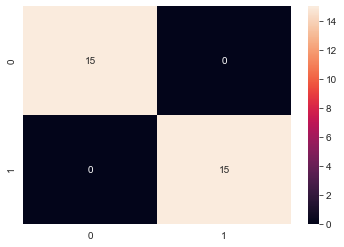

In [11]:
cf_matrix = model.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True);

### Metrics

In [12]:
recall = model.recall_score(y_test, y_pred)
precision = model.precision_score(y_test, y_pred)
f1 = model.f1_score(y_test, y_pred)
print("Precision =", precision)
print("Recall =", recall)
print("F1-score =", f1)

Precision = 1.0
Recall = 1.0
F1-score = 1.0
